In [1]:
import json

import openai
import sys
import os
from pathlib import Path

base_path = Path().resolve().parent
sys.path.append(str(base_path))

filepath = "/home/cc/AutomaticWorkflowGeneration/ActionEngine/eval/"

def read_json_to_dict(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return data

In [2]:
topologicalorder_result={}
datadependency_result={}

## Level Easy (1-2 nodes)

### Function Selection

In [3]:
"""
Load Ground Truth Labels
"""
label_filename = filepath + 'answers/test_tasklist/tasklist_GTlabel_1-2_nodes.json'
label_data = read_json_to_dict(label_filename)

In [4]:
"""
func_selection accuracy 
Accuracy = Number of Correctly Selected Functions / Total Number of Ground Truth Function
"""
def acc_func_selector(test_filename):
    test_set = read_json_to_dict(test_filename)
    result_scores = []
    for i in range(len(test_set)):
        test_data = test_set[i]
        accuracy_func_selector = [] 
        for j in range(len(label_data)):
            correct_count = 0
            if test_data["res"][j]["id"] == label_data[j]["id"]:
                label_api_names = [api["name"] for api in label_data[j]["selected_apis"]]
                test_api_names = [api["name"] for api in test_data["res"][j]["api_names"]]
                for k in range(len(label_api_names)):
                    if label_api_names[k] == test_api_names[k]:
                        correct_count += 1
                    # else: 
                    #     correct_count -= 1
                acc_per_query = correct_count / len(label_api_names)
                accuracy_func_selector.append(acc_per_query)
        score = sum(accuracy_func_selector) / len(accuracy_func_selector)
        result_scores.append(score)
    return result_scores

In [5]:
"""
API numbers
"""
test_filename = filepath + 'eval_data/func_selector/api_nums/nums_1-2_nodes.json'
api_num_res = acc_func_selector(test_filename)
print(api_num_res)

[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]


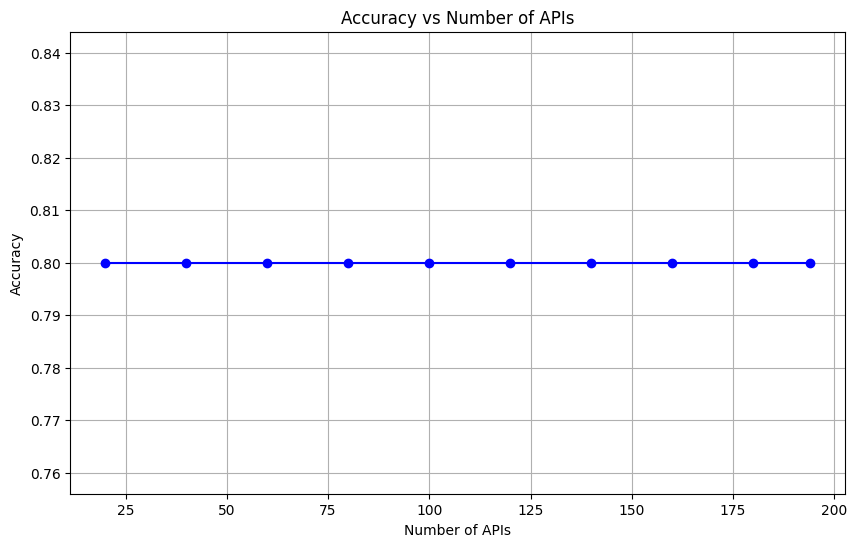

In [6]:
import matplotlib.pyplot as plt

# List of API numbers corresponding to different settings
num_apis = [20, 40, 60, 80, 100, 120, 140, 160, 180, 194]

# Create a plot
plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.plot(num_apis, api_num_res, marker='o', linestyle='-', color='b')

# Add title and labels
plt.title("Accuracy vs Number of APIs")
plt.xlabel("Number of APIs")
plt.ylabel("Accuracy")

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

In [6]:
"""
Domain numbers
"""
test_filename = filepath + 'eval_data/func_selector/domain_nums/domains_1-2_nodes.json'
domain_num_res = acc_func_selector(test_filename)
print(domain_num_res)


[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]


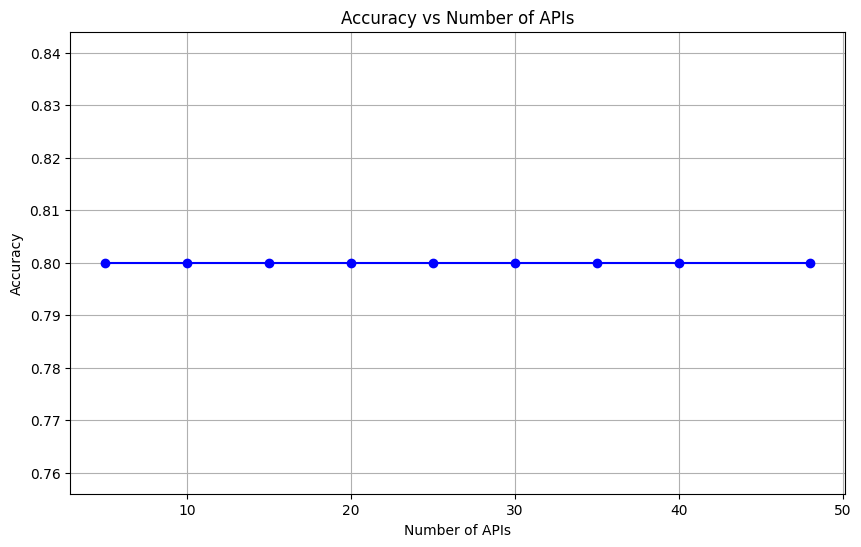

In [7]:
import matplotlib.pyplot as plt
# List of API numbers corresponding to different settings
num_apis = [5, 10,15, 20, 25, 30, 35, 40, 48]

# Create a plot
plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.plot(num_apis, domain_num_res, marker='o', linestyle='-', color='b')

# Add title and labels
plt.title("Accuracy vs Number of APIs")
plt.xlabel("Number of APIs")
plt.ylabel("Accuracy")

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

### Topological Ordering

In [8]:
"""
topologicl_order accuracy 
Accuracy  = Number of correctly ordered condition / Total number of condition
"""
def evaluate_accuracy(ground_truth, test_result):
    total_correct = 0
    total_pairs = 0
    additional_full_scores = 0  # Track the number of 0/0 cases

    # Iterate through both ground truth and test results
    for gt_item, test_item in zip(ground_truth, test_result):
        gt_pairs = set(gt_item['pairs'])  # Convert pairs to a set for easier comparison
        test_pairs = set(test_item['pairs'])
        
        if len(gt_pairs) == 0 and len(test_pairs) == 0:
            # Treat 0/0 as 100% correct
            additional_full_scores += 1
            # print(f"num {gt_item['num']}: 0 out of 0, counted as 100% correct")
        else:
            # Calculate the number of correctly ordered pairs
            correct_pairs = len(gt_pairs & test_pairs)  # Intersection of both sets
            total_correct += correct_pairs
            total_pairs += len(gt_pairs)
            # print(f"num {gt_item['num']}: {correct_pairs} out of {len(gt_pairs)} are correct")

    # Adjust the total correct to account for the 0/0 cases
    total_correct += additional_full_scores
    total_pairs += additional_full_scores

    # Calculate the accuracy
    accuracy = total_correct / total_pairs if total_pairs > 0 else 0

    print(f"Total correct: {total_correct} out of {total_pairs}")
    print(f"Accuracy: {accuracy:.3f}")

    return accuracy

def acc_topological_order(test_filename):
    test_set = read_json_to_dict(test_filename)
    result_scores = []
    for i in range(len(test_set)):
        test_data = test_set[i]
        label_data = label_set[i]
        score = evaluate_accuracy(label_data['label'], test_data['pairs'])
        result_scores.append(score)
    return result_scores

In [9]:
"""
Load Ground Truth Labels
"""
label_filename = filepath + 'answers/test_topologicalorder/topologicalorder_GTlabel_1-2_nodes.json'
label_set = read_json_to_dict(label_filename)
test_filename = filepath + 'eval_data/topological_order/easy_1-2_nodes.json'
test_set = read_json_to_dict(test_filename)

topological_order_res = acc_topological_order(test_filename)
print(topological_order_res)

Total correct: 1 out of 1
Accuracy: 1.000
Total correct: 1 out of 1
Accuracy: 1.000
Total correct: 1 out of 1
Accuracy: 1.000
Total correct: 1 out of 1
Accuracy: 1.000
Total correct: 1 out of 1
Accuracy: 1.000
Total correct: 2 out of 2
Accuracy: 1.000
Total correct: 2 out of 2
Accuracy: 1.000
Total correct: 2 out of 2
Accuracy: 1.000
Total correct: 2 out of 2
Accuracy: 1.000
Total correct: 2 out of 2
Accuracy: 1.000
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [10]:
## Add result
topologicalorder_result["easy"] =  topological_order_res

In [11]:
topologicalorder_result

{'easy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}

### Data Dependency Management

#### Dependency Classification of User Input and Dependent Parameter

In [12]:
"""
Metrices:
Correct Dependency Accuracy =  Number of Correctly Identified Dependencies / Total Number of Dependencies in Ground Truth

"""
def evaluate_classification_accuracy(ground_truth, test_data):
    total_correct = 0
    total_parameters = 0

    correct_user_inputs_total = 0
    total_user_inputs = 0
    correct_dependent_params_total = 0
    total_dependent_params = 0

    # Iterate over both lists simultaneously
    for gt, test in zip(ground_truth, test_data):
        # Ensure both are referring to the same task
        assert gt['name'] == test['name'], "Mismatch in task names"

        # Get user_input and dependent_params from both ground_truth and test_data
        gt_user_input = set(gt['user_input'])
        gt_dependent_params = set(gt['dependent_params'])

        test_user_input = set(test['user_input'])
        test_dependent_params = set(test['dependent_params'])

        # Initialize the variables for each task
        correct_user_input = 0
        total_user_input = 0
        correct_dependent_params = 0
        total_dependent_params_in_task = 0

        # Calculate correct user_input classification only if there are user inputs in the ground truth
        if len(gt_user_input) > 0:
            correct_user_input = len(gt_user_input & test_user_input)  # Intersection of sets
            total_user_input = len(gt_user_input)
            correct_user_inputs_total += correct_user_input
            total_user_inputs += total_user_input

        # Calculate correct dependent_params classification only if there are dependent params in the ground truth
        if len(gt_dependent_params) > 0:
            correct_dependent_params = len(gt_dependent_params & test_dependent_params)  # Intersection of sets
            total_dependent_params_in_task = len(gt_dependent_params)
            correct_dependent_params_total += correct_dependent_params
            total_dependent_params += total_dependent_params_in_task

        # Handle cases where either ground truth or test data is missing by treating it as perfect accuracy
        if len(gt_user_input) == 0:
            total_user_inputs += 1  # Add 1 as a total count
            correct_user_inputs_total += 1  # Assume it's correctly classified (i.e., accuracy is 1.0)
        
        if len(gt_dependent_params) == 0:
            total_dependent_params += 1  # Add 1 as a total count
            correct_dependent_params_total += 1  # Assume it's correctly classified (i.e., accuracy is 1.0)

    # Calculate overall accuracy based on total number of parameters classified
    total_parameters = total_user_inputs + total_dependent_params
    total_correct = correct_user_inputs_total + correct_dependent_params_total

    overall_accuracy = total_correct / total_parameters if total_parameters > 0 else 1.0

    # Calculate average user input and dependent params accuracy
    avg_user_input_accuracy = correct_user_inputs_total / total_user_inputs if total_user_inputs > 0 else 1.0
    avg_dependent_params_accuracy = correct_dependent_params_total / total_dependent_params if total_dependent_params > 0 else 1.0

    return overall_accuracy, avg_user_input_accuracy, avg_dependent_params_accuracy






def acc_dependency_classification(label_filename, test_filename):
    label_set = read_json_to_dict(label_filename)
    test_set = read_json_to_dict(test_filename)
    overall_accuracy, user_input_acc, dependent_param_acc = [], [], []
    for i in range(len(test_set)):
        test_data = test_set[i]
        label_data = label_set[i]
        ovreall_score, user_input_score, dependent_param_score = evaluate_classification_accuracy(label_data['param_dependency_management'], test_data['param_dependency_management'])
        overall_accuracy.append(ovreall_score)
        user_input_acc.append(user_input_score)
        dependent_param_acc.append(dependent_param_score)
    return overall_accuracy, user_input_acc, dependent_param_acc

In [13]:
"""
Load Ground Truth Labels
"""
label_filename = filepath + 'answers/test_datadependency/datadep_GTlabel_1-2_nodes.json'
test_filename = filepath + 'eval_data/data_dependency_management/easy_1-2_nodes.json'


overall_accuracy, user_input_acc, dependent_param_acc = acc_dependency_classification(label_filename, test_filename)

AssertionError: Mismatch in task names

In [14]:
print("User Input Accuracy")
print(user_input_acc)
print("Dependent Params Accuracy")
print(dependent_param_acc)
print("Overall Accuracy")
print(overall_accuracy)

User Input Accuracy


NameError: name 'user_input_acc' is not defined

In [123]:
## Add result
datadependency_result["easy"] = {"overall_acc": overall_accuracy, "user_input_acc": user_input_acc, "dependent_param_acc": dependent_param_acc}

In [124]:
datadependency_result

{'easy': {'overall_acc': [0.5, 1.0, 0.5, 0.5, 1.0, 0.75, 0.4, 1.0, 0.75, 0.6],
  'user_input_acc': [0.0,
   1.0,
   0.0,
   0.0,
   1.0,
   0.5,
   0.0,
   1.0,
   0.5,
   0.3333333333333333],
  'dependent_param_acc': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]},
 'intermediate': {'overall_acc': [0.6666666666666666,
   0.4,
   0.5714285714285714,
   0.8333333333333334,
   0.5454545454545454,
   0.5833333333333334,
   0.5833333333333334,
   0.7272727272727273,
   0.7272727272727273,
   0.5833333333333334],
  'user_input_acc': [0.0,
   0.0,
   0.4,
   0.75,
   0.2857142857142857,
   0.375,
   0.375,
   0.5714285714285714,
   0.5714285714285714,
   0.375],
  'dependent_param_acc': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  'param_acc': [0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 0.75, 1.0]},
 'hard': {'overall_acc': [0.75,
   0.5,
   0.7142857142857143,
   0.8571428571428571,
   0.7391304347826086,
   0.625,
   0.9285714285714286,
   0.1111111111111111,
   0.722222222222222

In [125]:
"""
Parameter Accuracy = Total Number of Parameters with Dependencies in Ground Truth / Number of Parameters with Correct Dependencies 
"""

def evaluate_dependency_accuracy(ground_truth, test_data):
    correct_dependencies = 0
    total_dependencies = 0

    # Iterate over both lists of tasks simultaneously
    for gt_task, test_task in zip(ground_truth, test_data):
        assert gt_task['name'] == test_task['name'], "API names do not match"

        gt_depended_params = gt_task['depended_params']
        test_depended_params = test_task['depended_params']

        # Iterate over the ground truth depended_params
        for gt_param_dependency in gt_depended_params:
            param_name = list(gt_param_dependency.keys())[0]  # Get the parameter name in ground truth
            gt_dependency = gt_param_dependency[param_name]  # The correct dependency in ground truth

            # Check if the parameter exists in the test data's depended_params
            for test_param_dependency in test_depended_params:
                if param_name in test_param_dependency:
                    test_dependency = test_param_dependency[param_name]
                    # If the dependency matches, count it as correct
                    if test_dependency == gt_dependency:
                        correct_dependencies += 1
                    break  # Move to the next ground truth parameter after match is found

            total_dependencies += 1  # Increment the total number of dependencies in the ground truth

    # Calculate the accuracy
    accuracy = correct_dependencies / total_dependencies if total_dependencies > 0 else None

    # Print the results
    print(f"Correctly Identified Dependencies: {correct_dependencies}/{total_dependencies}")
    print(f"Dependency Identification Accuracy: {accuracy if accuracy is not None else 'None'}")

    return accuracy


def acc_dependency(label_filename, test_filename):
    label_set = read_json_to_dict(label_filename)
    test_set = read_json_to_dict(test_filename)
    param_acc = []
    for i in range(len(test_set)):
    # for i in range(1):
        test_data = test_set[i]
        label_data = label_set[i]
        # print(test_data)
        # print('+++++++++++++++++')
        # print(label_data)
        score = evaluate_dependency_accuracy(label_data["selected_apis"], test_data["selected_apis"])
        param_acc.append(score)
    return param_acc

In [126]:
label_set = read_json_to_dict(label_filename)
test_set = read_json_to_dict(test_filename)
param_acc = acc_dependency(label_filename, test_filename)

Correctly Identified Dependencies: 0/0
Dependency Identification Accuracy: None
Correctly Identified Dependencies: 0/0
Dependency Identification Accuracy: None
Correctly Identified Dependencies: 0/0
Dependency Identification Accuracy: None
Correctly Identified Dependencies: 0/0
Dependency Identification Accuracy: None
Correctly Identified Dependencies: 0/0
Dependency Identification Accuracy: None
Correctly Identified Dependencies: 1/1
Dependency Identification Accuracy: 1.0
Correctly Identified Dependencies: 1/1
Dependency Identification Accuracy: 1.0
Correctly Identified Dependencies: 1/1
Dependency Identification Accuracy: 1.0
Correctly Identified Dependencies: 1/1
Dependency Identification Accuracy: 1.0
Correctly Identified Dependencies: 1/1
Dependency Identification Accuracy: 1.0


In [127]:
param_acc

[None, None, None, None, None, 1.0, 1.0, 1.0, 1.0, 1.0]

In [128]:
## Add result
datadependency_result["easy"]["param_acc"] = param_acc

In [88]:
datadependency_result

{'easy': {'overall_acc': [0.0, 1.0, 0.0, 0.0, 1.0, 0.5, 0.25, 1.0, 0.5, 0.5],
  'user_input_acc': [0.0,
   1.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.3333333333333333],
  'dependent_param_acc': [None,
   None,
   None,
   None,
   None,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'param_acc': [None, None, None, None, None, 1.0, 1.0, 1.0, 1.0, 1.0]}}

## Level Intermidiate (3-5 nodes)

### Function Selection

In [15]:
"""
Load Ground Truth Labels
"""
label_filename = filepath + 'answers/test_tasklist/tasklist_GTlabel_3-5_nodes.json'
label_data = read_json_to_dict(label_filename)

In [16]:
"""
func_selection accuracy 
Accuracy = Number of Correctly Selected Functions / Total Number of Ground Truth Function
"""
def acc_func_selector(test_filename):
    test_set = read_json_to_dict(test_filename)
    result_scores = []
    for i in range(len(test_set)):
        test_data = test_set[i]
        accuracy_func_selector = [] 
        for j in range(len(label_data)):
            correct_count = 0
            if test_data["label"][j]["id"] == label_data[j]["id"]:
                label_api_names = [api["name"] for api in label_data[j]["selected_apis"]]
                test_api_names = [api["name"] for api in test_data["label"][j]["api_names"]]
                for k in range(len(label_api_names)):
                    if label_api_names[k] == test_api_names[k]:
                        correct_count += 1
                    # else: 
                    #     correct_count -= 1
                acc_per_query = correct_count / len(label_api_names)
                accuracy_func_selector.append(acc_per_query)
        score = sum(accuracy_func_selector) / len(accuracy_func_selector)
        result_scores.append(score)
    return result_scores

In [17]:
"""
API numbers
"""
test_filename = filepath + 'eval_data/func_selector/api_nums/nums_3-5_nodes.json'
api_num_res = acc_func_selector(test_filename)
print(api_num_res)

[0.58, 0.58, 0.58, 0.6133333333333333, 0.58, 0.58, 0.58, 0.58, 0.6133333333333333, 0.6133333333333333]


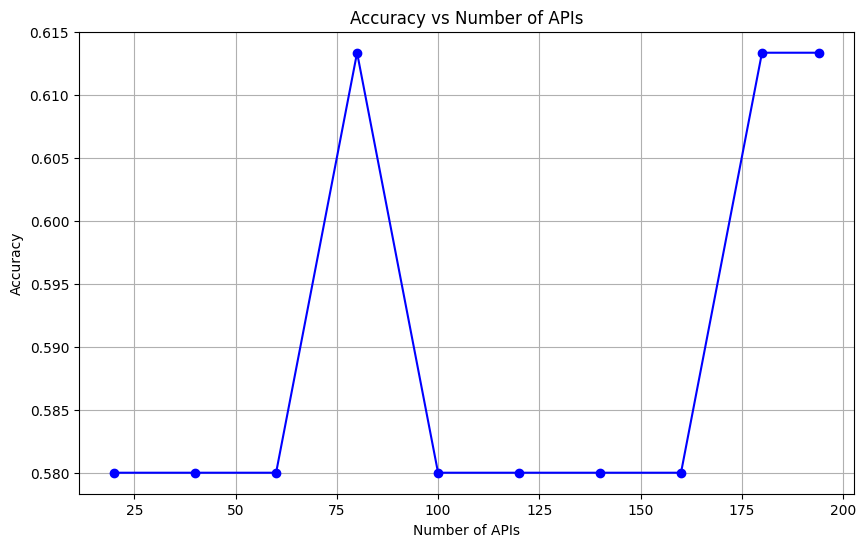

In [18]:
import matplotlib.pyplot as plt

# List of API numbers corresponding to different settings
num_apis = [20, 40, 60, 80, 100, 120, 140, 160, 180, 194]

# Create a plot
plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.plot(num_apis, api_num_res, marker='o', linestyle='-', color='b')

# Add title and labels
plt.title("Accuracy vs Number of APIs")
plt.xlabel("Number of APIs")
plt.ylabel("Accuracy")

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

In [19]:
"""
Domain numbers
"""
test_filename = filepath + 'eval_data/func_selector/domain_nums/domains_3-5_nodes.json'
domain_num_res = acc_func_selector(test_filename)
print(domain_num_res)


[0.58, 0.6133333333333333, 0.6133333333333333, 0.58, 0.6133333333333333, 0.6133333333333333, 0.58, 0.58, 0.6133333333333333]


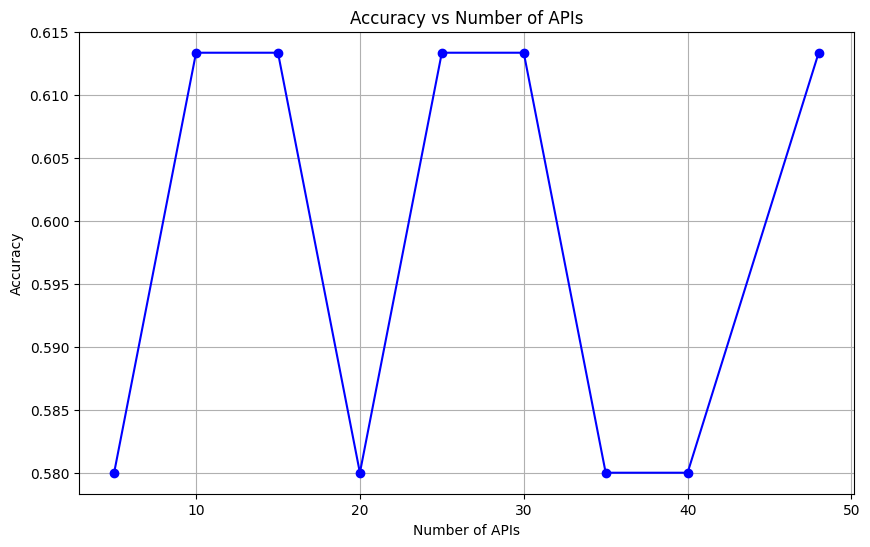

In [20]:
import matplotlib.pyplot as plt
# List of API numbers corresponding to different settings
num_apis = [5, 10,15, 20, 25, 30, 35, 40, 48]

# Create a plot
plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.plot(num_apis, domain_num_res, marker='o', linestyle='-', color='b')

# Add title and labels
plt.title("Accuracy vs Number of APIs")
plt.xlabel("Number of APIs")
plt.ylabel("Accuracy")

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

### Topological Ordering

In [21]:
"""
topologicl_order accuracy 
Accuracy  = Number of correctly ordered condition / Total number of condition
"""
def evaluate_accuracy(ground_truth, test_result):
    total_correct = 0
    total_pairs = 0
    additional_full_scores = 0  # Track the number of 0/0 cases

    # Iterate through both ground truth and test results
    for gt_item, test_item in zip(ground_truth, test_result):
        gt_pairs = set(gt_item['pairs'])  # Convert pairs to a set for easier comparison
        test_pairs = set(test_item['pairs'])
        
        if len(gt_pairs) == 0 and len(test_pairs) == 0:
            # Treat 0/0 as 100% correct
            additional_full_scores += 1
            # print(f"num {gt_item['num']}: 0 out of 0, counted as 100% correct")
        else:
            # Calculate the number of correctly ordered pairs
            correct_pairs = len(gt_pairs & test_pairs)  # Intersection of both sets
            total_correct += correct_pairs
            total_pairs += len(gt_pairs)
            # print(f"num {gt_item['num']}: {correct_pairs} out of {len(gt_pairs)} are correct")

    # Adjust the total correct to account for the 0/0 cases
    total_correct += additional_full_scores
    total_pairs += additional_full_scores

    # Calculate the accuracy
    accuracy = total_correct / total_pairs if total_pairs > 0 else 0

    print(f"Total correct: {total_correct} out of {total_pairs}")
    print(f"Accuracy: {accuracy:.3f}")

    return accuracy

def acc_topological_order(test_filename):
    test_set = read_json_to_dict(test_filename)
    result_scores = []
    for i in range(len(test_set)):
        test_data = test_set[i]
        label_data = label_set[i]
        score = evaluate_accuracy(label_data['label'], test_data['pairs'])
        result_scores.append(score)
    return result_scores

In [22]:
"""
Load Ground Truth Labels
"""
label_filename = filepath + 'answers/test_topologicalorder/topologicalorder_GTlabel_3-5_nodes.json'
label_set = read_json_to_dict(label_filename)
test_filename = filepath + 'eval_data/topological_order/inter_3-5_nodes.json'
test_set = read_json_to_dict(test_filename)

topological_order_res = acc_topological_order(test_filename)
print(topological_order_res)

Total correct: 4 out of 4
Accuracy: 1.000
Total correct: 4 out of 4
Accuracy: 1.000
Total correct: 4 out of 4
Accuracy: 1.000
Total correct: 4 out of 4
Accuracy: 1.000
Total correct: 11 out of 11
Accuracy: 1.000
Total correct: 11 out of 11
Accuracy: 1.000
Total correct: 11 out of 11
Accuracy: 1.000
Total correct: 11 out of 11
Accuracy: 1.000
Total correct: 11 out of 11
Accuracy: 1.000
Total correct: 11 out of 11
Accuracy: 1.000
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [23]:
## Add result
topologicalorder_result["intermidiate"] = topological_order_res
topologicalorder_result


{'easy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'intermidiate': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}

### Data Dependency Management

#### Dependency Classification of User Input and Dependent Parameter

In [24]:
"""
Metrices:
Correct Dependency Accuracy =  Number of Correctly Identified Dependencies / Total Number of Dependencies in Ground Truth

"""

def evaluate_classification_accuracy(ground_truth, test_data):
    total_correct = 0
    total_parameters = 0

    correct_user_inputs_total = 0
    total_user_inputs = 0
    correct_dependent_params_total = 0
    total_dependent_params = 0

    # Iterate over both lists simultaneously
    for gt, test in zip(ground_truth, test_data):
        # Ensure both are referring to the same task
        assert gt['name'] == test['name'], "Mismatch in task names"

        # Get user_input and dependent_params from both ground_truth and test_data
        gt_user_input = set(gt['user_input'])
        gt_dependent_params = set(gt['dependent_params'])

        test_user_input = set(test['user_input'])
        test_dependent_params = set(test['dependent_params'])
        print("gt_user_input", gt_user_input)
        print("test_user_input", test_user_input)
        print("-"*40)
        print("gt_dependent_params", gt_dependent_params)
        print("test_dependent_params", test_dependent_params)
        print("*"*40)

        # Initialize the variables for each task
        correct_user_input = 0
        total_user_input = 0
        correct_dependent_params = 0
        total_dependent_params_in_task = 0

        # Calculate correct user_input classification only if there are user inputs in the ground truth
        if len(gt_user_input) > 0:
            correct_user_input = len(gt_user_input & test_user_input)  # Intersection of sets
            total_user_input = len(gt_user_input)
            correct_user_inputs_total += correct_user_input
            total_user_inputs += total_user_input

        # Calculate correct dependent_params classification only if there are dependent params in the ground truth
        if len(gt_dependent_params) > 0:
            correct_dependent_params = len(gt_dependent_params & test_dependent_params)  # Intersection of sets
            total_dependent_params_in_task = len(gt_dependent_params)
            correct_dependent_params_total += correct_dependent_params
            total_dependent_params += total_dependent_params_in_task

        # Debug information for each item
        print(f"Task: {gt['name']}")
        print(f"Correctly classified user_input: {correct_user_input}/{total_user_input}")
        print(f"Correctly classified dependent_params: {correct_dependent_params}/{total_dependent_params_in_task}")
        print()

    # Calculate overall accuracy based on total number of parameters classified
    total_parameters = total_user_inputs + total_dependent_params
    total_correct = correct_user_inputs_total + correct_dependent_params_total

    overall_accuracy = total_correct / total_parameters if total_parameters > 0 else None

    # Calculate average user input and dependent params accuracy
    avg_user_input_accuracy = correct_user_inputs_total / total_user_inputs if total_user_inputs > 0 else None
    avg_dependent_params_accuracy = correct_dependent_params_total / total_dependent_params if total_dependent_params > 0 else None

    # Output overall results
    print(f"Overall Accuracy: {overall_accuracy if overall_accuracy is not None else 'None'}")
    print(f"User Input Accuracy: {avg_user_input_accuracy if avg_user_input_accuracy is not None else 'None'}")
    print(f"Dependent Params Accuracy: {avg_dependent_params_accuracy if avg_dependent_params_accuracy is not None else 'None'}")

    return overall_accuracy, avg_user_input_accuracy, avg_dependent_params_accuracy





def acc_dependency_classification(label_filename, test_filename):
    label_set = read_json_to_dict(label_filename)
    test_set = read_json_to_dict(test_filename)
    overall_accuracy, user_input_acc, dependent_param_acc = [], [], []
    # for i in range(len(test_set)):
    for i in range(1):
        test_data = test_set[i]
        label_data = label_set[i]
        ovreall_score, user_input_score, dependent_param_score = evaluate_classification_accuracy(label_data['param_dependency_management'], test_data['param_dependency_management'])
        overall_accuracy.append(ovreall_score)
        user_input_acc.append(user_input_score)
        dependent_param_acc.append(dependent_param_score)
    return overall_accuracy, user_input_acc, dependent_param_acc

In [25]:
"""
Load Ground Truth Labels
"""
label_filename = filepath + 'answers/test_datadependency/datadep_GTlabel_3-5_nodes.json'
test_filename = filepath + 'eval_data/data_dependency_management/inter_3-5_nodes.json'


overall_accuracy, user_input_acc, dependent_param_acc = acc_dependency_classification(label_filename, test_filename)

AssertionError: Mismatch in task names

In [156]:
print("User Input Accuracy")
print(user_input_acc)
print("Dependent Params Accuracy")
print(dependent_param_acc)
print("Overall Accuracy")
print(overall_accuracy)

User Input Accuracy
[0.0]
Dependent Params Accuracy
[1.0]
Overall Accuracy
[0.6666666666666666]


In [95]:
datadependency_result["intermediate"] = {"overall_acc": overall_accuracy, "user_input_acc": user_input_acc, "dependent_param_acc": dependent_param_acc}

In [96]:
"""
Parameter Accuracy = Total Number of Parameters with Dependencies in Ground Truth / Number of Parameters with Correct Dependencies 
"""

def evaluate_dependency_accuracy(ground_truth, test_data):
    correct_dependencies = 0
    total_dependencies = 0

    # Iterate over both lists of tasks simultaneously
    for gt_task, test_task in zip(ground_truth, test_data):
        assert gt_task['name'] == test_task['name'], "API names do not match"

        gt_depended_params = gt_task['depended_params']
        test_depended_params = test_task['depended_params']

        # Iterate over the ground truth depended_params
        for gt_param_dependency in gt_depended_params:
            param_name = list(gt_param_dependency.keys())[0]  # Get the parameter name in ground truth
            gt_dependency = gt_param_dependency[param_name]  # The correct dependency in ground truth

            # Check if the parameter exists in the test data's depended_params
            for test_param_dependency in test_depended_params:
                if param_name in test_param_dependency:
                    test_dependency = test_param_dependency[param_name]
                    # If the dependency matches, count it as correct
                    if test_dependency == gt_dependency:
                        correct_dependencies += 1
                    break  # Move to the next ground truth parameter after match is found

            total_dependencies += 1  # Increment the total number of dependencies in the ground truth

    # Calculate the accuracy
    accuracy = correct_dependencies / total_dependencies if total_dependencies > 0 else None

    # Print the results
    print(f"Correctly Identified Dependencies: {correct_dependencies}/{total_dependencies}")
    print(f"Dependency Identification Accuracy: {accuracy if accuracy is not None else 'None'}")

    return accuracy


def acc_dependency(label_filename, test_filename):
    label_set = read_json_to_dict(label_filename)
    test_set = read_json_to_dict(test_filename)
    param_acc = []
    for i in range(len(test_set)):
    # for i in range(1):
        test_data = test_set[i]
        label_data = label_set[i]
        # print(test_data)
        # print('+++++++++++++++++')
        # print(label_data)
        score = evaluate_dependency_accuracy(label_data["selected_apis"], test_data["selected_apis"])
        param_acc.append(score)
    return param_acc

In [97]:
label_set = read_json_to_dict(label_filename)
test_set = read_json_to_dict(test_filename)
param_acc = acc_dependency(label_filename, test_filename)

Correctly Identified Dependencies: 1/2
Dependency Identification Accuracy: 0.5
Correctly Identified Dependencies: 1/2
Dependency Identification Accuracy: 0.5
Correctly Identified Dependencies: 1/2
Dependency Identification Accuracy: 0.5
Correctly Identified Dependencies: 1/2
Dependency Identification Accuracy: 0.5
Correctly Identified Dependencies: 4/4
Dependency Identification Accuracy: 1.0
Correctly Identified Dependencies: 4/4
Dependency Identification Accuracy: 1.0
Correctly Identified Dependencies: 4/4
Dependency Identification Accuracy: 1.0
Correctly Identified Dependencies: 4/4
Dependency Identification Accuracy: 1.0
Correctly Identified Dependencies: 3/4
Dependency Identification Accuracy: 0.75
Correctly Identified Dependencies: 4/4
Dependency Identification Accuracy: 1.0


In [98]:
param_acc

[0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 0.75, 1.0]

In [99]:
datadependency_result["intermediate"]["param_acc"] = param_acc
datadependency_result["intermediate"]

{'overall_acc': [0.6666666666666666,
  0.4,
  0.5714285714285714,
  0.8333333333333334,
  0.5454545454545454,
  0.5833333333333334,
  0.5833333333333334,
  0.7272727272727273,
  0.7272727272727273,
  0.5833333333333334],
 'user_input_acc': [0.0,
  0.0,
  0.4,
  0.75,
  0.2857142857142857,
  0.375,
  0.375,
  0.5714285714285714,
  0.5714285714285714,
  0.375],
 'dependent_param_acc': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'param_acc': [0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 0.75, 1.0]}

In [100]:
datadependency_result["intermediate"]

{'overall_acc': [0.6666666666666666,
  0.4,
  0.5714285714285714,
  0.8333333333333334,
  0.5454545454545454,
  0.5833333333333334,
  0.5833333333333334,
  0.7272727272727273,
  0.7272727272727273,
  0.5833333333333334],
 'user_input_acc': [0.0,
  0.0,
  0.4,
  0.75,
  0.2857142857142857,
  0.375,
  0.375,
  0.5714285714285714,
  0.5714285714285714,
  0.375],
 'dependent_param_acc': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'param_acc': [0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 0.75, 1.0]}

## Level Hard (6-10 nodes)

### Function Selection

In [41]:
"""
Load Ground Truth Labels
"""
label_filename = filepath + 'answers/test_tasklist/tasklist_GTlabel_6-10_nodes.json'
label_data = read_json_to_dict(label_filename)

In [42]:
"""
func_selection accuracy 
Accuracy = Number of Correctly Selected Functions / Total Number of Ground Truth Function
"""
def acc_func_selector(test_filename):
    test_set = read_json_to_dict(test_filename)
    result_scores = []
    for i in range(len(test_set)):
        test_data = test_set[i]
        accuracy_func_selector = [] 
        for j in range(len(label_data)):
            correct_count = 0
            if test_data["label"][j]["id"] == label_data[j]["id"]:
                label_api_names = [api["name"] for api in label_data[j]["selected_apis"]]
                test_api_names = [api["name"] for api in test_data["label"][j]["api_names"]]
                for k in range(len(label_api_names)):
                    if label_api_names[k] == test_api_names[k]:
                        correct_count += 1
                    # else: 
                    #     correct_count -= 1
                acc_per_query = correct_count / len(label_api_names)
                accuracy_func_selector.append(acc_per_query)
        score = sum(accuracy_func_selector) / len(accuracy_func_selector)
        result_scores.append(score)
    return result_scores

In [43]:
"""
API numbers
"""
test_filename = filepath + 'eval_data/func_selector/api_nums/nums_6-10_nodes.json'
api_num_res = acc_func_selector(test_filename)
print(api_num_res)

[0.6582142857142858, 0.6582142857142858, 0.6582142857142858, 0.6582142857142858, 0.6582142857142858, 0.6582142857142858, 0.6582142857142858, 0.6582142857142858, 0.6582142857142858, 0.6582142857142858]


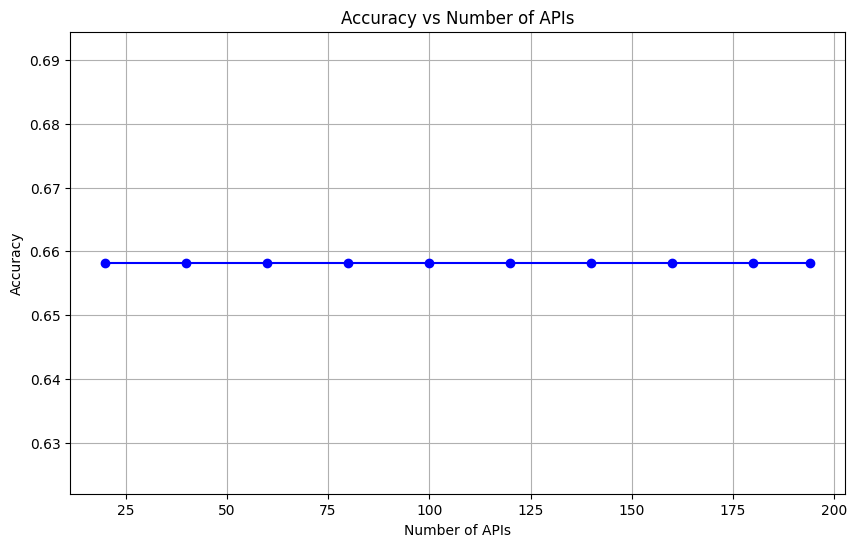

In [44]:
import matplotlib.pyplot as plt

# List of API numbers corresponding to different settings
num_apis = [20, 40, 60, 80, 100, 120, 140, 160, 180, 194]

# Create a plot
plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.plot(num_apis, api_num_res, marker='o', linestyle='-', color='b')

# Add title and labels
plt.title("Accuracy vs Number of APIs")
plt.xlabel("Number of APIs")
plt.ylabel("Accuracy")

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

In [45]:
"""
Domain numbers
"""
test_filename = filepath + 'eval_data/func_selector/domain_nums/domains_6-10_nodes.json'
domain_num_res = acc_func_selector(test_filename)
print(domain_num_res)


[0.6582142857142858, 0.6582142857142858, 0.6582142857142858, 0.6582142857142858, 0.6725, 0.6582142857142858, 0.6582142857142858, 0.6582142857142858, 0.6582142857142858]


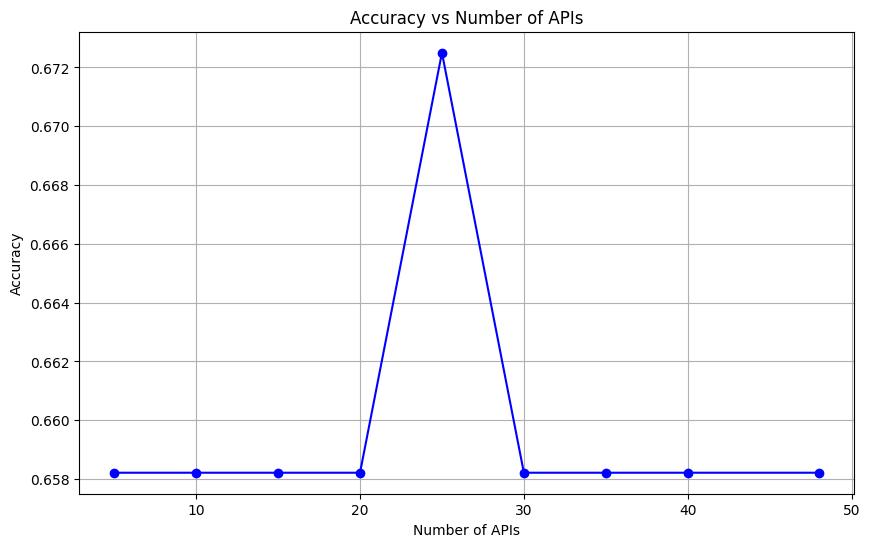

In [46]:
import matplotlib.pyplot as plt
# List of API numbers corresponding to different settings
num_apis = [5, 10,15, 20, 25, 30, 35, 40, 48]

# Create a plot
plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.plot(num_apis, domain_num_res, marker='o', linestyle='-', color='b')

# Add title and labels
plt.title("Accuracy vs Number of APIs")
plt.xlabel("Number of APIs")
plt.ylabel("Accuracy")

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

### Topological Ordering

In [101]:
"""
topologicl_order accuracy 
Accuracy  = Number of correctly ordered condition / Total number of condition
"""
def evaluate_accuracy(ground_truth, test_result):
    total_correct = 0
    total_pairs = 0
    additional_full_scores = 0  # Track the number of 0/0 cases

    # Iterate through both ground truth and test results
    for gt_item, test_item in zip(ground_truth, test_result):
        gt_pairs = set(gt_item['pairs'])  # Convert pairs to a set for easier comparison
        test_pairs = set(test_item['pairs'])
        
        if len(gt_pairs) == 0 and len(test_pairs) == 0:
            # Treat 0/0 as 100% correct
            additional_full_scores += 1
            # print(f"num {gt_item['num']}: 0 out of 0, counted as 100% correct")
        else:
            # Calculate the number of correctly ordered pairs
            correct_pairs = len(gt_pairs & test_pairs)  # Intersection of both sets
            total_correct += correct_pairs
            total_pairs += len(gt_pairs)
            # print(f"num {gt_item['num']}: {correct_pairs} out of {len(gt_pairs)} are correct")

    # Adjust the total correct to account for the 0/0 cases
    total_correct += additional_full_scores
    total_pairs += additional_full_scores

    # Calculate the accuracy
    accuracy = total_correct / total_pairs if total_pairs > 0 else 0

    print(f"Total correct: {total_correct} out of {total_pairs}")
    print(f"Accuracy: {accuracy:.3f}")

    return accuracy

def acc_topological_order(test_filename):
    test_set = read_json_to_dict(test_filename)
    result_scores = []
    for i in range(len(test_set)):
        test_data = test_set[i]
        label_data = label_set[i]
        score = evaluate_accuracy(label_data['label'], test_data['pairs'])
        result_scores.append(score)
    return result_scores

In [102]:
"""
Load Ground Truth Labels
"""
label_filename = filepath + 'answers/test_topologicalorder/topologicalorder_GTlabel_6-10_nodes.json'
label_set = read_json_to_dict(label_filename)
test_filename = filepath + 'eval_data/topological_order/hard_6-10_nodes.json'
test_set = read_json_to_dict(test_filename)

topological_order_res = acc_topological_order(test_filename)
print(topological_order_res)

Total correct: 13 out of 13
Accuracy: 1.000
Total correct: 10 out of 10
Accuracy: 1.000
Total correct: 19 out of 19
Accuracy: 1.000
Total correct: 16 out of 16
Accuracy: 1.000
Total correct: 26 out of 26
Accuracy: 1.000
Total correct: 17 out of 17
Accuracy: 1.000
Total correct: 25 out of 25
Accuracy: 1.000
Total correct: 1 out of 1
Accuracy: 1.000
Total correct: 35 out of 35
Accuracy: 1.000
Total correct: 1 out of 1
Accuracy: 1.000
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [103]:
# Add result
topologicalorder_result["hard"] = topological_order_res
topologicalorder_result["hard"]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

### Data Dependency Management

#### Dependency Classification of User Input and Dependent Parameter

In [133]:
"""
Metrices:
Correct Dependency Accuracy =  Number of Correctly Identified Dependencies / Total Number of Dependencies in Ground Truth

"""

def evaluate_classification_accuracy(ground_truth, test_data):
    total_correct = 0
    total_parameters = 0

    correct_user_inputs_total = 0
    total_user_inputs = 0
    correct_dependent_params_total = 0
    total_dependent_params = 0

    # Iterate over both lists simultaneously
    for gt, test in zip(ground_truth, test_data):
        # Ensure both are referring to the same task
        assert gt['name'] == test['name'], "Mismatch in task names"

        # Get user_input and dependent_params from both ground_truth and test_data
        gt_user_input = set(gt['user_input'])
        gt_dependent_params = set(gt['dependent_params'])

        test_user_input = set(test['user_input'])
        test_dependent_params = set(test['dependent_params'])

        # Initialize the variables for each task
        correct_user_input = 0
        total_user_input = 0
        correct_dependent_params = 0
        total_dependent_params_in_task = 0

        # Calculate correct user_input classification only if there are user inputs in the ground truth
        if len(gt_user_input) > 0:
            correct_user_input = len(gt_user_input & test_user_input)  # Intersection of sets
            total_user_input = len(gt_user_input)
            correct_user_inputs_total += correct_user_input
            total_user_inputs += total_user_input

        # Calculate correct dependent_params classification only if there are dependent params in the ground truth
        if len(gt_dependent_params) > 0:
            correct_dependent_params = len(gt_dependent_params & test_dependent_params)  # Intersection of sets
            total_dependent_params_in_task = len(gt_dependent_params)
            correct_dependent_params_total += correct_dependent_params
            total_dependent_params += total_dependent_params_in_task

        # Handle cases where either ground truth or test data is missing by treating it as perfect accuracy
        if len(gt_user_input) == 0:
            total_user_inputs += 1  # Add 1 as a total count
            correct_user_inputs_total += 1  # Assume it's correctly classified (i.e., accuracy is 1.0)
        
        if len(gt_dependent_params) == 0:
            total_dependent_params += 1  # Add 1 as a total count
            correct_dependent_params_total += 1  # Assume it's correctly classified (i.e., accuracy is 1.0)

    # Calculate overall accuracy based on total number of parameters classified
    total_parameters = total_user_inputs + total_dependent_params
    total_correct = correct_user_inputs_total + correct_dependent_params_total

    overall_accuracy = total_correct / total_parameters if total_parameters > 0 else 1.0

    # Calculate average user input and dependent params accuracy
    avg_user_input_accuracy = correct_user_inputs_total / total_user_inputs if total_user_inputs > 0 else 1.0
    avg_dependent_params_accuracy = correct_dependent_params_total / total_dependent_params if total_dependent_params > 0 else 1.0

    return overall_accuracy, avg_user_input_accuracy, avg_dependent_params_accuracy






def acc_dependency_classification(label_filename, test_filename):
    label_set = read_json_to_dict(label_filename)
    test_set = read_json_to_dict(test_filename)
    overall_accuracy, user_input_acc, dependent_param_acc = [], [], []
    for i in range(len(test_set)):
        test_data = test_set[i]
        label_data = label_set[i]
        ovreall_score, user_input_score, dependent_param_score = evaluate_classification_accuracy(label_data['param_dependency_management'], test_data['param_dependency_management'])
        overall_accuracy.append(ovreall_score)
        user_input_acc.append(user_input_score)
        dependent_param_acc.append(dependent_param_score)
    return overall_accuracy, user_input_acc, dependent_param_acc

In [134]:
"""
Load Ground Truth Labels
"""
label_filename = filepath + 'answers/test_datadependency/datadep_GTlabel_6-10_nodes.json'
test_filename = filepath + 'eval_data/data_dependency_management/inter_6-10_nodes.json'


overall_accuracy, user_input_acc, dependent_param_acc = acc_dependency_classification(label_filename, test_filename)

In [135]:
print("User Input Accuracy")
print(user_input_acc)
print("Dependent Params Accuracy")
print(dependent_param_acc)
print("Overall Accuracy")
print(overall_accuracy)

User Input Accuracy
[0.7, 0.42857142857142855, 0.6363636363636364, 0.8, 0.6666666666666666, 0.625, 0.9, 0.1111111111111111, 0.6428571428571429, 0.2]
Dependent Params Accuracy
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Overall Accuracy
[0.8125, 0.6923076923076923, 0.7777777777777778, 0.8823529411764706, 0.7692307692307693, 0.8125, 0.9444444444444444, 0.5555555555555556, 0.7916666666666666, 0.6]


In [136]:
# save result
datadependency_result["hard"] = {"overall_acc": overall_accuracy, "user_input_acc": user_input_acc, "dependent_param_acc": dependent_param_acc}

In [137]:
"""
Parameter Accuracy = Total Number of Parameters with Dependencies in Ground Truth / Number of Parameters with Correct Dependencies 
"""

def evaluate_dependency_accuracy(ground_truth, test_data):
    correct_dependencies = 0
    total_dependencies = 0

    # Iterate over both lists of tasks simultaneously
    for gt_task, test_task in zip(ground_truth, test_data):
        assert gt_task['name'] == test_task['name'], "API names do not match"

        gt_depended_params = gt_task['depended_params']
        test_depended_params = test_task['depended_params']

        # Iterate over the ground truth depended_params
        for gt_param_dependency in gt_depended_params:
            param_name = list(gt_param_dependency.keys())[0]  # Get the parameter name in ground truth
            gt_dependency = gt_param_dependency[param_name]  # The correct dependency in ground truth

            # Check if the parameter exists in the test data's depended_params
            for test_param_dependency in test_depended_params:
                if param_name in test_param_dependency:
                    test_dependency = test_param_dependency[param_name]
                    # If the dependency matches, count it as correct
                    if test_dependency == gt_dependency:
                        correct_dependencies += 1
                    break  # Move to the next ground truth parameter after match is found

            total_dependencies += 1  # Increment the total number of dependencies in the ground truth

    # Calculate the accuracy
    accuracy = correct_dependencies / total_dependencies if total_dependencies > 0 else None

    # Print the results
    print(f"Correctly Identified Dependencies: {correct_dependencies}/{total_dependencies}")
    print(f"Dependency Identification Accuracy: {accuracy if accuracy is not None else 'None'}")

    return accuracy


def acc_dependency(label_filename, test_filename):
    label_set = read_json_to_dict(label_filename)
    test_set = read_json_to_dict(test_filename)
    param_acc = []
    for i in range(len(test_set)):
    # for i in range(1):
        test_data = test_set[i]
        label_data = label_set[i]
        # print(test_data)
        # print('+++++++++++++++++')
        # print(label_data)
        score = evaluate_dependency_accuracy(label_data["selected_apis"], test_data["selected_apis"])
        param_acc.append(score)
    return param_acc

In [138]:
label_set = read_json_to_dict(label_filename)
test_set = read_json_to_dict(test_filename)
param_acc = acc_dependency(label_filename, test_filename)

Correctly Identified Dependencies: 2/3
Dependency Identification Accuracy: 0.6666666666666666
Correctly Identified Dependencies: 1/3
Dependency Identification Accuracy: 0.3333333333333333
Correctly Identified Dependencies: 3/4
Dependency Identification Accuracy: 0.75
Correctly Identified Dependencies: 1/4
Dependency Identification Accuracy: 0.25
Correctly Identified Dependencies: 5/7
Dependency Identification Accuracy: 0.7142857142857143
Correctly Identified Dependencies: 1/4
Dependency Identification Accuracy: 0.25
Correctly Identified Dependencies: 3/6
Dependency Identification Accuracy: 0.5
Correctly Identified Dependencies: 0/0
Dependency Identification Accuracy: None
Correctly Identified Dependencies: 4/5
Dependency Identification Accuracy: 0.8
Correctly Identified Dependencies: 0/0
Dependency Identification Accuracy: None


In [139]:
datadependency_result["hard"]["param_acc"] = param_acc


## Plot the result

/tmp/ipykernel_35690/3852429718.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(accuracy_values, labels=labels, patch_artist=True)


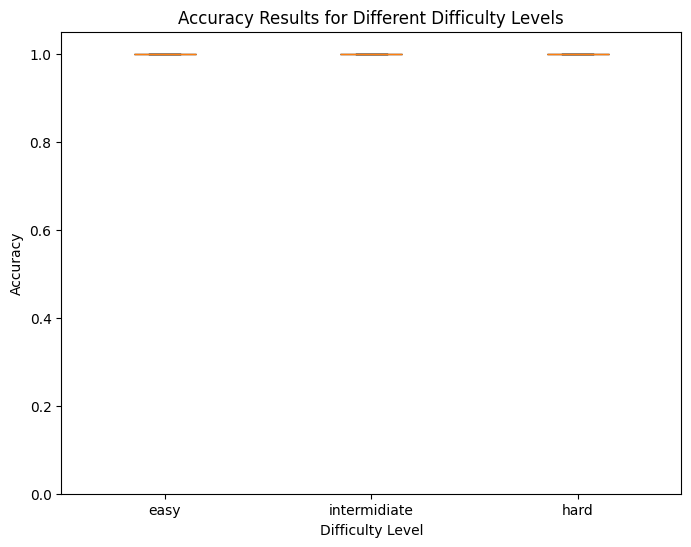

In [140]:
# Preparing the data for the box plot
data = topologicalorder_result
# Preparing the data for the box plot
labels = list(data.keys())
accuracy_values = [data[key] for key in labels]

# Creating the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(accuracy_values, labels=labels, patch_artist=True)

# Setting y-axis limits as accuracy values are between 0 and 1
plt.ylim(0, 1.05)

# Adding titles and labels
plt.title('Accuracy Results for Different Difficulty Levels')
plt.xlabel('Difficulty Level')
plt.ylabel('Accuracy')

# Displaying the plot
plt.show()

In [141]:
print(datadependency_result['easy'])
print(datadependency_result['intermediate'])
print(datadependency_result['hard'])


{'overall_acc': [0.5, 1.0, 0.5, 0.5, 1.0, 0.75, 0.4, 1.0, 0.75, 0.6], 'user_input_acc': [0.0, 1.0, 0.0, 0.0, 1.0, 0.5, 0.0, 1.0, 0.5, 0.3333333333333333], 'dependent_param_acc': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'param_acc': [None, None, None, None, None, 1.0, 1.0, 1.0, 1.0, 1.0]}
{'overall_acc': [0.6666666666666666, 0.4, 0.5714285714285714, 0.8333333333333334, 0.5454545454545454, 0.5833333333333334, 0.5833333333333334, 0.7272727272727273, 0.7272727272727273, 0.5833333333333334], 'user_input_acc': [0.0, 0.0, 0.4, 0.75, 0.2857142857142857, 0.375, 0.375, 0.5714285714285714, 0.5714285714285714, 0.375], 'dependent_param_acc': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'param_acc': [0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 0.75, 1.0]}
{'overall_acc': [0.8125, 0.6923076923076923, 0.7777777777777778, 0.8823529411764706, 0.7692307692307693, 0.8125, 0.9444444444444444, 0.5555555555555556, 0.7916666666666666, 0.6], 'user_input_acc': [0.7, 0.42857142857142855, 0.63636363

In [142]:
print(datadependency_result)

{'easy': {'overall_acc': [0.5, 1.0, 0.5, 0.5, 1.0, 0.75, 0.4, 1.0, 0.75, 0.6], 'user_input_acc': [0.0, 1.0, 0.0, 0.0, 1.0, 0.5, 0.0, 1.0, 0.5, 0.3333333333333333], 'dependent_param_acc': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'param_acc': [None, None, None, None, None, 1.0, 1.0, 1.0, 1.0, 1.0]}, 'intermediate': {'overall_acc': [0.6666666666666666, 0.4, 0.5714285714285714, 0.8333333333333334, 0.5454545454545454, 0.5833333333333334, 0.5833333333333334, 0.7272727272727273, 0.7272727272727273, 0.5833333333333334], 'user_input_acc': [0.0, 0.0, 0.4, 0.75, 0.2857142857142857, 0.375, 0.375, 0.5714285714285714, 0.5714285714285714, 0.375], 'dependent_param_acc': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'param_acc': [0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 0.75, 1.0]}, 'hard': {'overall_acc': [0.8125, 0.6923076923076923, 0.7777777777777778, 0.8823529411764706, 0.7692307692307693, 0.8125, 0.9444444444444444, 0.5555555555555556, 0.7916666666666666, 0.6], 'user_input_acc': [0

/tmp/ipykernel_35690/2770108837.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([easy_data, intermediate_data, difficult_data], labels=['easy', 'intermediate', 'hard'], patch_artist=True)


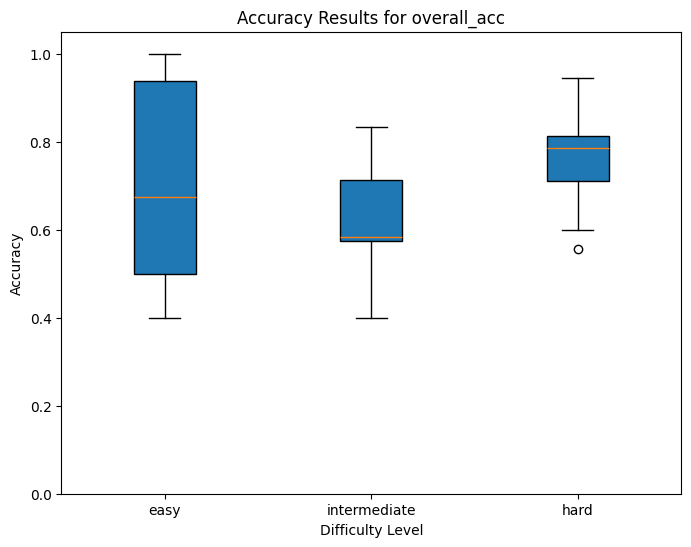

/tmp/ipykernel_35690/2770108837.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([easy_data, intermediate_data, difficult_data], labels=['easy', 'intermediate', 'hard'], patch_artist=True)


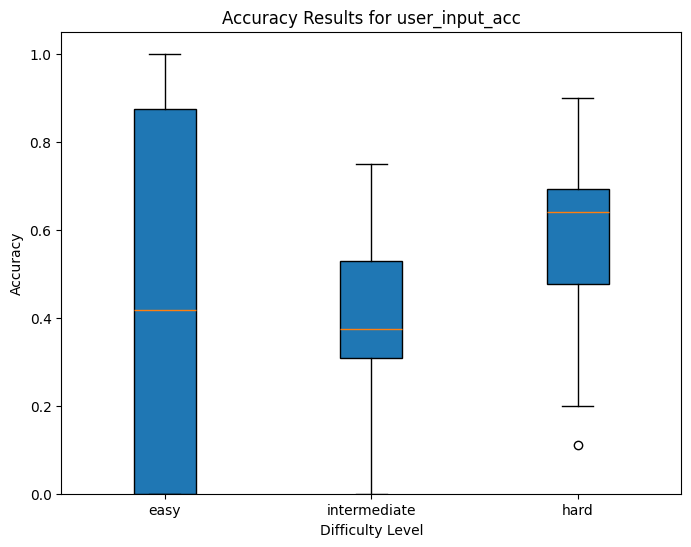

/tmp/ipykernel_35690/2770108837.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([easy_data, intermediate_data, difficult_data], labels=['easy', 'intermediate', 'hard'], patch_artist=True)


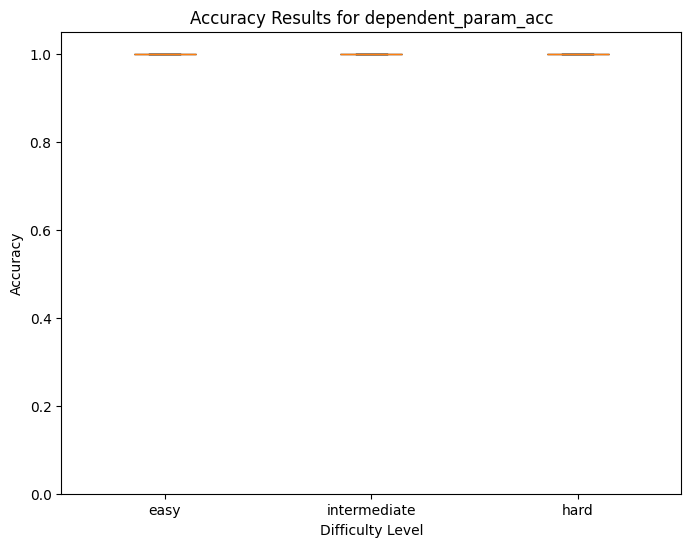

/tmp/ipykernel_35690/2770108837.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([easy_data, intermediate_data, difficult_data], labels=['easy', 'intermediate', 'hard'], patch_artist=True)


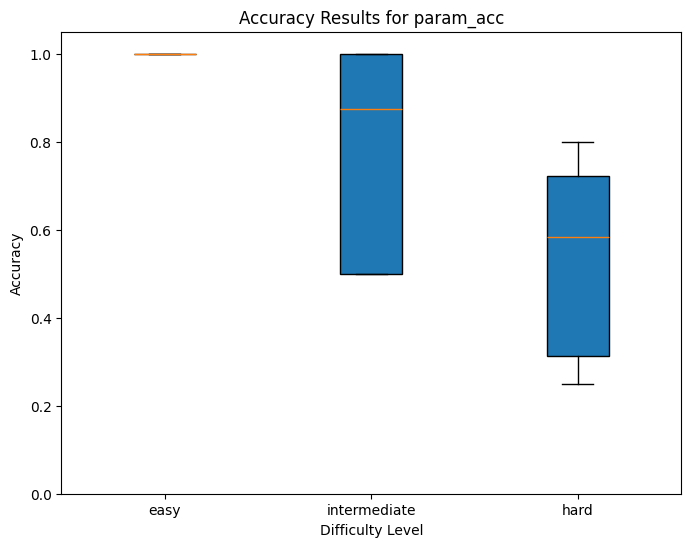

In [143]:
data = datadependency_result
# Function to create a box plot for a given category (e.g., overall_acc, user_input_acc)
def create_box_plot(category):
    # Prepare data for the box plot
    easy_data = [x for x in data['easy'][category] if x is not None]
    intermediate_data = [x for x in data['intermediate'][category] if x is not None]
    difficult_data = [x for x in data['hard'][category] if x is not None]

    # Box plot creation
    plt.figure(figsize=(8, 6))
    plt.boxplot([easy_data, intermediate_data, difficult_data], labels=['easy', 'intermediate', 'hard'], patch_artist=True)

    # Set plot titles and labels
    plt.title(f'Accuracy Results for {category}')
    plt.xlabel('Difficulty Level')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.05)  # Set y-axis limit between 0 and slightly above 1

    # Show plot
    plt.show()

# Generate box plots for each category
categories = ['overall_acc', 'user_input_acc', 'dependent_param_acc', 'param_acc']
for category in categories:
    create_box_plot(category)